In [1]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

/Users/thomascross/opt/anaconda3/lib/python3.8/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [2]:
#Import Desired PES
from ipynb.fs.full.O3_PES_fortran_DAWES import PES

### Manual Inputs

In [3]:
molecule = ["O-17", "O-17", "O-17"]

In [4]:
#Temperature
T = 300

In [5]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [6]:
mass = ((element[molecule[0]] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element[molecule[2]] * u * kg_to_me))

In [7]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

### Calculations 

In [8]:
Key, Pos =  Key_and_Pos(coord)

In [9]:
PES_func = PES(Key, Pos, molecule)

In [10]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [11]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [12]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [13]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [14]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [15]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [16]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [17]:
sigma = sigma_ij(displace_val, cubic)

In [18]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [19]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

In [20]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_777_Dawes")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1088.759562    1069.261409  3.346580  3.305505  3.346580  3.321981
1  1056.939123    1009.375092  0.422531  0.416227  0.422531  0.417414
2   687.451021     670.370799  0.375163  0.369677  0.375163  0.370820


In [21]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [22]:
print(deltaETOSH)

[[1069.26140907]
 [1009.3750917 ]
 [ 670.37079939]]


In [23]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 74/74 [00:10<00:00,  6.80it/s] 


In [24]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 74/74 [00:10<00:00,  6.80it/s] 


In [25]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 74/74 [00:10<00:00,  7.17it/s] 


In [26]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.039)
##

In [27]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.047)
##

In [28]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 1)
##

In [29]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

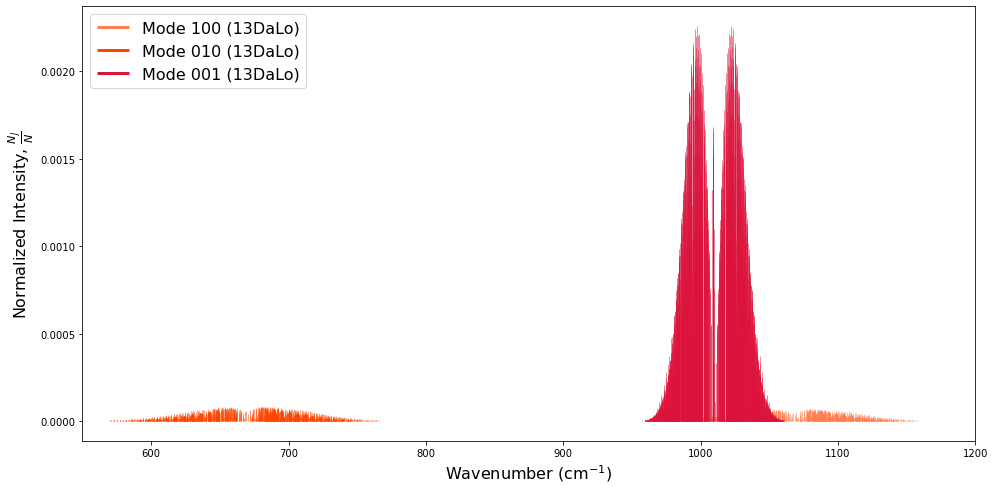

In [30]:
plt.figure(figsize=(16,8))

plt.vlines(P_nu1, 0, Final_I[0], "coral", label="Mode 100 (13DaLo)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "coral", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "coral", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "orangered", label="Mode 010 (13DaLo)",linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "orangered", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "orangered", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "crimson", label="Mode 001 (13DaLo)", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "crimson", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "crimson", linewidth=.5)

plt.xlim(550, 1200)

plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'upper left', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_777_13DaLo_{T}K.pdf")

plt.show()

OTHER POTENTIAL

In [31]:
from ipynb.fs.full.O3_PES_fortran_JT import PES

In [32]:
Key, Pos =  Key_and_Pos(coord)

In [33]:
PES_func = PES(Key, Pos, molecule)

In [34]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [35]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [36]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [37]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [38]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [39]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [40]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [41]:
sigma = sigma_ij(displace_val, cubic)

In [42]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [43]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

In [44]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_777_18PoZo")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1100.834650    1088.461723  3.346580  3.304424  3.346580  3.321982
1  1057.338144    1016.693754  0.422531  0.416348  0.422531  0.417657
2   694.020169     681.735483  0.375163  0.369759  0.375163  0.371012


In [45]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [46]:
P_nu1_pot2, P_rot_nu1_pot2, P_index_nu1_pot2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1_pot2, Q_rot_nu1_pot2, Q_index_nu1_pot2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1_pot2, R_rot_nu1_pot2, R_index_nu1_pot2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 74/74 [00:13<00:00,  5.59it/s] 


In [47]:
P_nu2_pot2, P_rot_nu2_pot2, P_index_nu2_pot2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2_pot2, Q_rot_nu2_pot2, Q_index_nu2_pot2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2_pot2, R_rot_nu2_pot2, R_index_nu2_pot2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 74/74 [00:10<00:00,  7.11it/s] 


In [48]:
P_nu3_pot2, P_rot_nu3_pot2, P_index_nu3_pot2 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3_pot2, Q_rot_nu3_pot2, Q_index_nu3_pot2 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3_pot2, R_rot_nu3_pot2, R_index_nu3_pot2 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 74/74 [00:10<00:00,  6.93it/s] 


In [49]:
nu1_I = Norm_I(P_rot_nu1_pot2, P_index_nu1_pot2, Q_rot_nu1_pot2, Q_index_nu1_pot2, R_rot_nu1_pot2, R_index_nu1_pot2, T, 1, 0.039)
##_pot2

In [50]:
nu2_I = Norm_I(P_rot_nu2_pot2, P_index_nu2_pot2, Q_rot_nu2_pot2, Q_index_nu2_pot2, R_rot_nu2_pot2, R_index_nu2_pot2, T, 1, 0.047)
##

In [51]:
nu3_I = Norm_I(P_rot_nu3_pot2, P_index_nu3_pot2, Q_rot_nu3_pot2, Q_index_nu3_pot2, R_rot_nu3_pot2, R_index_nu3_pot2, T, 1, 1)
##

In [52]:
Final_I_pot2 = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

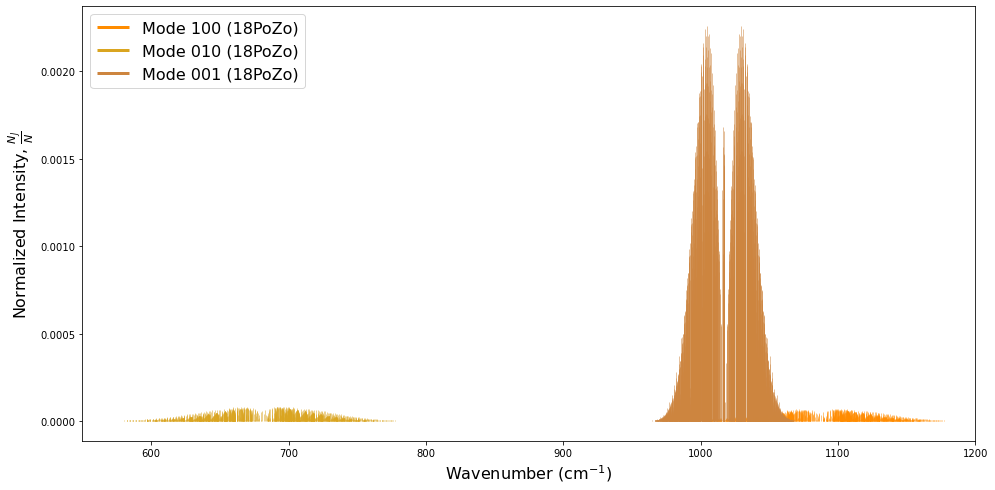

In [53]:
plt.figure(figsize=(16,8))

plt.vlines(P_nu1_pot2, 0, Final_I_pot2[0], "darkorange", label="Mode 100 (18PoZo)", linewidth=.5)
plt.vlines(Q_nu1_pot2, 0, Final_I_pot2[1], "darkorange", linewidth=.5)
plt.vlines(R_nu1_pot2, 0, Final_I_pot2[2], "darkorange", linewidth=.5)

plt.vlines(P_nu2_pot2, 0, Final_I_pot2[3], "goldenrod", label="Mode 010 (18PoZo)",linewidth=.5)
plt.vlines(Q_nu2_pot2, 0, Final_I_pot2[4], "goldenrod", linewidth=.5)
plt.vlines(R_nu2_pot2, 0, Final_I_pot2[5], "goldenrod", linewidth=.5)

plt.vlines(P_nu3_pot2, 0, Final_I_pot2[6], "peru", label="Mode 001 (18PoZo)", linewidth=.5)
plt.vlines(Q_nu3_pot2, 0, Final_I_pot2[7], "peru", linewidth=.5)
plt.vlines(R_nu3_pot2, 0, Final_I_pot2[8], "peru", linewidth=.5)

plt.xlim(550, 1200)

plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'upper left', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_777_18PoZo_{T}K.pdf")

plt.show()

Compare the two pots

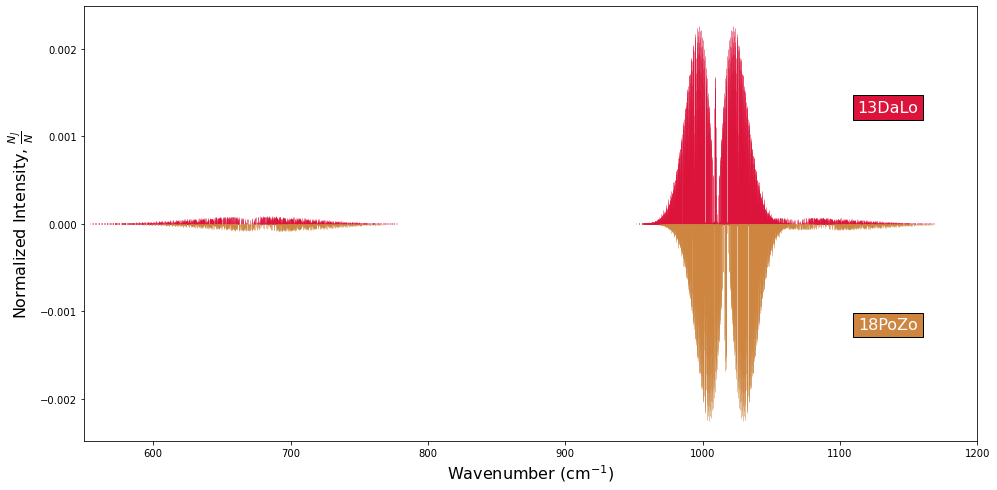

In [54]:
plt.figure(figsize=(16,8))

plt.vlines(P_nu1, 0, Final_I[0], "crimson", label="Mode 100 (13DaLo)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "crimson", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "crimson", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "crimson", label="Mode 010 (13DaLo)",linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "crimson", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "crimson", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "crimson", label="Mode 001 (13DaLo)", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "crimson", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "crimson", linewidth=.5)

plt.vlines(P_nu1_pot2, 0, -Final_I_pot2[0], "peru", label="Mode 100 (18PoZo)", linewidth=.5)
plt.vlines(Q_nu1_pot2, 0, -Final_I_pot2[1], "peru", linewidth=.5)
plt.vlines(R_nu1_pot2, 0, -Final_I_pot2[2], "peru", linewidth=.5)

plt.vlines(P_nu2_pot2, 0, -Final_I_pot2[3], "peru", label="Mode 010 (18PoZo)",linewidth=.5)
plt.vlines(Q_nu2_pot2, 0, -Final_I_pot2[4], "peru", linewidth=.5)
plt.vlines(R_nu2_pot2, 0, -Final_I_pot2[5], "peru", linewidth=.5)

plt.vlines(P_nu3_pot2, 0, -Final_I_pot2[6], "peru", label="Mode 001 (18PoZo)", linewidth=.5)
plt.vlines(Q_nu3_pot2, 0, -Final_I_pot2[7], "peru", linewidth=.5)
plt.vlines(R_nu3_pot2, 0, -Final_I_pot2[8], "peru", linewidth=.5)

plt.xlim(550, 1200)

plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

plt.annotate('13DaLo', xy=(0.9, 0.75), xytext=(0.9, 0.75), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom', color="white",
            bbox=dict(boxstyle='square', fc='crimson'))
plt.annotate('18PoZo', xy=(0.9, 0.25), xytext=(0.9, 0.25), xycoords='axes fraction', 
            fontsize=16, ha='center', va='bottom', color="white",
            bbox=dict(boxstyle='square', fc='peru'))

#legend = plt.legend(loc = 'upper left', fontsize=16)
#for handl in legend.legendHandles:
#    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_777_13DaLo_vs_18PoZo_{T}K.pdf")

plt.show()

In [55]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [56]:
P_nu1_lit, P_rot_nu1_lit, P_index_nu1_lit = asytop_v_P(1, J_max_arr, "B", 1070.9 , A_rot, 3.347, B_rot, 0.417, C_rot, 0.369)

Q_nu1_lit, Q_rot_nu1_lit, Q_index_nu1_lit = asytop_v_Q(1, J_max_arr, "B", 1070.9 , A_rot, 3.347, B_rot, 0.417, C_rot, 0.369)

R_nu1_lit, R_rot_nu1_lit, R_index_nu1_lit = asytop_v_R(1, J_max_arr, "B", 1070.9 , A_rot, 3.347, B_rot, 0.417, C_rot, 0.369)
##

100%|██████████| 74/74 [00:14<00:00,  5.04it/s] 


In [57]:
P_nu2_lit, P_rot_nu2_lit, P_index_nu2_lit = asytop_v_P(1, J_max_arr, "B", 677.5 , A_rot, 3.273, B_rot, 0.419, C_rot, 0.369)

Q_nu2_lit, Q_rot_nu2_lit, Q_index_nu2_lit = asytop_v_Q(1, J_max_arr, "B", 677.5 , A_rot, 3.273, B_rot, 0.419, C_rot, 0.369)

R_nu2_lit, R_rot_nu2_lit, R_index_nu2_lit = asytop_v_R(1, J_max_arr, "B", 677.5 , A_rot, 3.273, B_rot, 0.419, C_rot, 0.369)
##

100%|██████████| 74/74 [00:12<00:00,  5.91it/s] 


In [58]:
P_nu3_lit, P_rot_nu3_lit, P_index_nu3_lit = asytop_v_P(2, J_max_arr, "A", 1012.2, A_rot, 3.296, B_rot, 0.415, C_rot, 0.368)

Q_nu3_lit, Q_rot_nu3_lit, Q_index_nu3_lit = asytop_v_Q(2, J_max_arr, "A", 1012.2, A_rot, 3.296, B_rot, 0.415, C_rot, 0.368)

R_nu3_lit, R_rot_nu3_lit, R_index_nu3_lit = asytop_v_R(2, J_max_arr, "A", 1012.2, A_rot, 3.296, B_rot, 0.415, C_rot, 0.368)
##

100%|██████████| 74/74 [00:10<00:00,  6.87it/s] 


In [59]:
nu1_I = Norm_I(P_rot_nu1_lit, P_index_nu1_lit, Q_rot_nu1_lit, Q_index_nu1_lit, R_rot_nu1_lit, R_index_nu1_lit, T, 1, 0.039)
##_lit

In [60]:
nu2_I = Norm_I(P_rot_nu2_lit, P_index_nu2_lit, Q_rot_nu2_lit, Q_index_nu2_lit, R_rot_nu2_lit, R_index_nu2_lit, T, 1, 0.047)
##

In [61]:
nu3_I = Norm_I(P_rot_nu3_lit, P_index_nu3_lit, Q_rot_nu3_lit, Q_index_nu3_lit, R_rot_nu3_lit, R_index_nu3_lit, T, 1, 1)
##

In [62]:
Final_I_lit = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

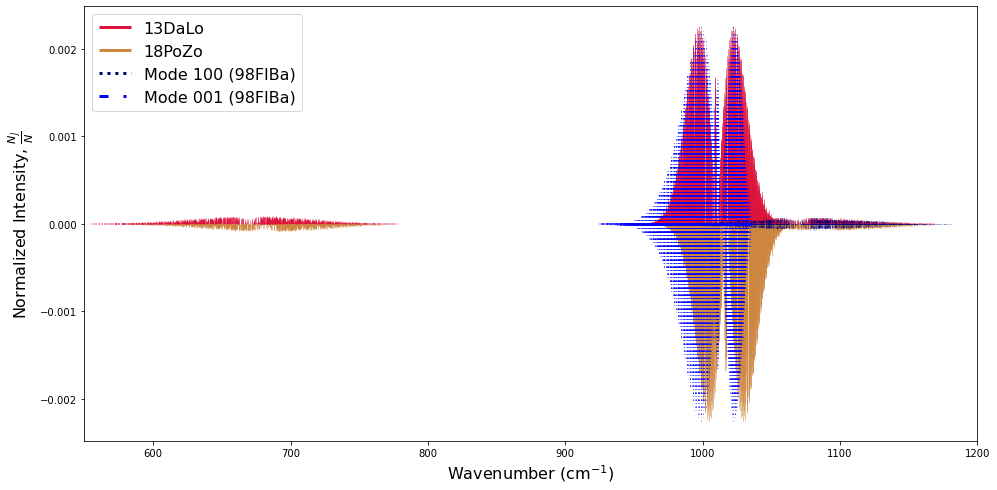

In [63]:
plt.figure(figsize=(16,8))

plt.vlines(P_nu1, 0, Final_I[0], "crimson", label="13DaLo", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "crimson", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "crimson", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "crimson", linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "crimson", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "crimson", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "crimson", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "crimson", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "crimson", linewidth=.5)

plt.vlines(P_nu1_pot2, 0, -Final_I_pot2[0], "peru", label="18PoZo", linewidth=.5)
plt.vlines(Q_nu1_pot2, 0, -Final_I_pot2[1], "peru", linewidth=.5)
plt.vlines(R_nu1_pot2, 0, -Final_I_pot2[2], "peru", linewidth=.5)

plt.vlines(P_nu2_pot2, 0, -Final_I_pot2[3], "peru", linewidth=.5)
plt.vlines(Q_nu2_pot2, 0, -Final_I_pot2[4], "peru", linewidth=.5)
plt.vlines(R_nu2_pot2, 0, -Final_I_pot2[5], "peru", linewidth=.5)

plt.vlines(P_nu3_pot2, 0, -Final_I_pot2[6], "peru", linewidth=.5)
plt.vlines(Q_nu3_pot2, 0, -Final_I_pot2[7], "peru", linewidth=.5)
plt.vlines(R_nu3_pot2, 0, -Final_I_pot2[8], "peru", linewidth=.5)

plt.vlines(P_nu1_lit, 0, Final_I_lit[0], "navy", linestyle="dotted", label="Mode 100 (98FlBa)",linewidth=.5)
plt.vlines(Q_nu1_lit, 0, Final_I_lit[1], "navy", linestyle="dotted",linewidth=.5)
plt.vlines(R_nu1_lit, 0, Final_I_lit[2], "navy", linestyle="dotted",linewidth=.5)
plt.vlines(P_nu1_lit, 0, -Final_I_lit[0], "navy",linestyle="dotted",linewidth=.5)
plt.vlines(Q_nu1_lit, 0, -Final_I_lit[1], "navy", linestyle="dotted",linewidth=.5)
plt.vlines(R_nu1_lit, 0, -Final_I_lit[2], "navy", linestyle="dotted",linewidth=.5)

plt.vlines(P_nu3_lit, 0, Final_I_lit[6], "blue", linestyle=(0, (3, 5, 1, 5)), label="Mode 001 (98FlBa)",linewidth=.5)
plt.vlines(Q_nu3_lit, 0, Final_I_lit[7], "blue", linestyle=(0, (3, 5, 1, 5)),linewidth=.5)
plt.vlines(R_nu3_lit, 0, Final_I_lit[8], "blue", linestyle=(0, (3, 5, 1, 5)),linewidth=.5)
plt.vlines(P_nu3_lit, 0, -Final_I_lit[6], "blue",linestyle=(0, (3, 5, 1, 5)),linewidth=.5)
plt.vlines(Q_nu3_lit, 0, -Final_I_lit[7], "blue", linestyle=(0, (3, 5, 1, 5)),linewidth=.5)
plt.vlines(R_nu3_lit, 0, -Final_I_lit[8], "blue", linestyle=(0, (3, 5, 1, 5)),linewidth=.5)

plt.xlim(550, 1200)

plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

#plt.annotate('13DaLo', xy=(0.9, 0.75), xytext=(0.9, 0.75), xycoords='axes fraction', 
##            fontsize=16, ha='center', va='bottom', color="white",
#            bbox=dict(boxstyle='square', fc='crimson'))
#plt.annotate('18PoZo', xy=(0.9, 0.25), xytext=(0.9, 0.25), xycoords='axes fraction', 
#            fontsize=16, ha='center', va='bottom', color="white",
#            bbox=dict(boxstyle='square', fc='peru'))
#plt.annotate('98FlBa', xy=(0.1, 0.25), xytext=(0.1, 0.25), xycoords='axes fraction', 
#            fontsize=16, ha='center', va='bottom', color="white",
#            bbox=dict(boxstyle='square', fc='blue'))

legend = plt.legend(loc = 'upper left', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_777_13DaLo_vs_18PoZo_with_98FLBa_{T}K.pdf")

plt.show()